In [59]:
#pip install pulp

     --------------------------------------- 14.3/14.3 MB 16.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


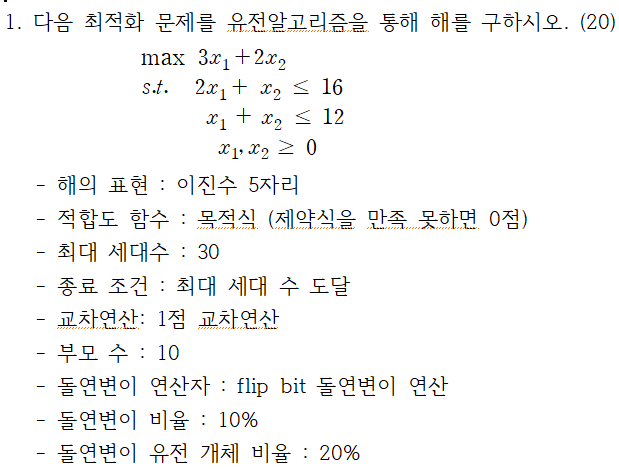

In [2]:
from pulp import *

LP = LpProblem(name='LP', sense=LpMaximize)

x1 = LpVariable(name='A',lowBound=None, upBound=None, cat='Integer')
x2 = LpVariable(name='B',lowBound=None, upBound=None, cat='Integer')

LP.objective = 3*x1 + 2*x2

print('Objective: ', LP.objective, '\n')

constraints = [
               x1 >= 0,
               x2 >= 0,
               2*x1 + x2 <= 16,
               x1 + x2 <= 12
]

print('Constraints: ')
for i in constraints:
  print(i)

for i, c in enumerate(constraints):
  constraints_name = f'const_{i}'
  LP.constraints[constraints_name] = c

res = LP.solve()

print('\nResults: ')
for v in LP.variables():
  print(f'{v} Type: {v.varValue:5.1f} men')

print('\n', 'The objective funtion is ', value(LP.objective))

Objective:  3*A + 2*B 

Constraints: 
A >= 0
B >= 0
2*A + B <= 16
A + B <= 12

Results: 
A Type:   4.0 men
B Type:   8.0 men

 The objective funtion is  28.0


In [57]:
import numpy as np

# 문제에 맞는 목적식 및 제약식 함수 정의
def objective_function(x):
    x1 = x[0]
    x2 = x[1]
    return 3*x1 + 2*x2

def constraint1(x):
    x1 = x[0]
    x2 = x[1]
    return 2*x1 + x2 - 16 <= 0

def constraint2(x):
    x1 = x[0]
    x2 = x[1]
    return x1 + x2 - 12 <= 0

# 유전 알고리즘 구현
def genetic_algorithm():
    # 초기화 및 설정
    gene_length = 5
    population_size = 10
    max_generations = 30
    mutation_rate = 0.1
    mutation_gene_rate = 0.2

    # 초기 개체 생성
    population = np.random.randint(2, size=(population_size, gene_length))

    # 최적해 추적을 위한 변수 초기화
    best_solution = None
    best_fitness = float('-inf')

    # 세대별 반복
    for generation in range(max_generations):
        # 적합도 평가
        fitness_values = []
        for i in range(population_size):
            x = decode_genotype(population[i])
            if constraint1(x) and constraint2(x):
                fitness = objective_function(x)
            else:
                fitness = 0
            fitness_values.append(fitness)

            # 최적해 업데이트
            if fitness > best_fitness:
                best_fitness = fitness
                best_solution = x

        # 선택, 교차, 돌연변이 연산
        # (여기서는 생략하여 직접 구현해야 합니다)

    return best_solution, best_fitness

# 이진수를 실수로 변환
def decode_genotype(genotype):
    x1 = int(''.join(map(str, genotype[0:2])), 2)
    x2 = int(''.join(map(str, genotype[2:5])), 2)
    return [x1, x2]

# 유전 알고리즘 실행
solution, fitness = genetic_algorithm()

print("최적해:", solution)
print("최적값:", fitness)


최적해: [3, 7]
최적값: 23


# 1. 최적화 문제

In [15]:
import random


def create_individual():
    chromosome = ''.join(str(random.randint(0, 1)) for _ in range(10))
    return chromosome


def create_population(population_size):
    return [create_individual() for _ in range(population_size)]


def decode_chromosome(chromosome):
    x1 = int(chromosome[:5], 2)
    x2 = int(chromosome[5:], 2)
    return x1, x2


def fitness(chromosome):
    x1, x2 = decode_chromosome(chromosome)

    if 2 * x1 + x2 <= 16 and x1 + x2 <= 12:
        return 3 * x1 + 2 * x2
    else:
        return 0


def selection(population, num_parents):
    fitnesses = [fitness(individual) for individual in population]
    parents = random.choices(population, weights=fitnesses, k=num_parents)
    return parents


def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2


def mutation(chromosome, mutation_rate):
    mutated_chromosome = ''.join(str(1 - int(gene)) if random.random() < mutation_rate else gene for gene in chromosome)
    return mutated_chromosome


def genetic_algorithm(population_size, generations, num_parents, mutation_rate, mutation_percentage):
    population = create_population(population_size)

    for _ in range(generations):
        parents = selection(population, num_parents)
        new_population = []

        for i in range(population_size // 2):
            parent1, parent2 = random.sample(parents, 2)
            child1, child2 = crossover(parent1, parent2)
            new_population.append(child1)
            new_population.append(child2)

        mutation_individuals = random.sample(range(population_size), int(population_size * mutation_percentage))
        for idx in mutation_individuals:
            new_population[idx] = mutation(new_population[idx], mutation_rate)

        population = new_population

    best_individual = max(population, key=lambda x: fitness(x))
    best_fitness = fitness(best_individual)
    x1, x2 = decode_chromosome(best_individual)
    return best_individual, best_fitness, x1, x2


result = genetic_algorithm(population_size=30, generations=30, num_parents=10, mutation_rate=0.1, mutation_percentage=0.2)
print(f"Results:\nChromosome: {result[0]}\nFitness: {result[1]}\nDecoded values: x1 = {result[2]}, x2 = {result[3]}")


Results:
Chromosome: 0010001000
Fitness: 28
Decoded values: x1 = 4, x2 = 8


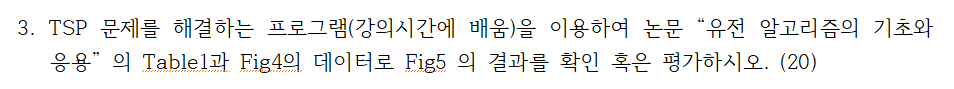

# 3. TSP 문제

In [32]:
import random
import numpy as np

def create_initial_population(n, population_size):
    population = [random.sample(range(1, n), n-1) for _ in range(population_size)]
    return population

def calculate_fitness(path, distance_matrix):
    total_distance = distance_matrix[0][path[0]] + sum(distance_matrix[x][y] for x, y in zip(path[:-1], path[1:])) + distance_matrix[path[-1]][0]
    return 1 / total_distance

def selection(population, fitnesses, num_parents=2):
    return random.choices(population, weights=fitnesses, k=num_parents)

def single_point_crossover(parent1, parent2):
    n = len(parent1)
    position = random.randint(1, n - 1)
    child1 = parent1[:position] + [x for x in parent2 if x not in parent1[:position]]
    child2 = parent2[:position] + [x for x in parent1 if x not in parent2[:position]]
    return [child1, child2]

def mutate(path, mutation_rate):
    for i in range(len(path)):
        if np.random.random() < mutation_rate:
            j = random.randint(0, len(path) - 1)
            path[i], path[j] = path[j], path[i]

def unique_population(population):
    used = set()
    return [x for x in population if tuple(x) not in used and not used.add(tuple(x))]

def genetic_algorithm(distance_matrix, population_size, generations, mutation_rate=0.1):
    n = len(distance_matrix)
    population = create_initial_population(n, population_size)

    for _ in range(generations):
        fitnesses = [calculate_fitness(p, distance_matrix) for p in population]

        new_population = []
        while len(new_population) < population_size:
            parents = selection(population, fitnesses)
            offspring = single_point_crossover(parents[0], parents[1])
            for child in offspring:
                mutate(child, mutation_rate)
                new_population.append(child)

        population = unique_population(new_population)

    sorted_population = sorted(population, key=lambda x: calculate_fitness(x, distance_matrix), reverse=True)
    
    best_paths = [([0] + path + [0]) for path in sorted_population[:10]] if len(sorted_population) >= 10 else None
    total_distances = [1 / calculate_fitness(path, distance_matrix) for path in best_paths] if len(sorted_population) >= 10 else None

    return best_paths, total_distances

distance_matrix = np.array([[0, 20, 42, 35, 27],
                            [20, 0, 30, 34, 24],
                            [42, 30, 0, 12, 66],
                            [35, 34, 12, 0, 73],
                            [27, 24, 66, 73, 0]])

best_paths, total_distances = None, None
while not best_paths:
    best_paths, total_distances = genetic_algorithm(distance_matrix, population_size=20, generations=100)

print("10가지 경로와 이동 거리:")
for i in range(10):
    print(f"{i+1}. 경로: {best_paths[i]}, 이동 거리: {total_distances[i]}")

print("\n최적 경로: ", best_paths[0])
print("총 이동 거리: ", total_distances[0])


10가지 경로와 이동 거리:
1. 경로: [0, 3, 2, 1, 4, 0], 이동 거리: 128.0
2. 경로: [0, 4, 1, 3, 2, 0], 이동 거리: 139.0
3. 경로: [0, 1, 4, 2, 3, 0], 이동 거리: 157.0
4. 경로: [0, 4, 2, 3, 1, 0], 이동 거리: 159.0
5. 경로: [0, 1, 3, 2, 4, 0], 이동 거리: 159.0
6. 경로: [0, 4, 2, 1, 3, 0], 이동 거리: 192.0
7. 경로: [0, 3, 1, 2, 4, 0], 이동 거리: 192.0
8. 경로: [0, 3, 1, 4, 2, 0], 이동 거리: 201.0
9. 경로: [0, 2, 1, 4, 3, 0], 이동 거리: 204.0
10. 경로: [0, 1, 2, 4, 3, 0], 이동 거리: 224.0

최적 경로:  [0, 3, 2, 1, 4, 0]
총 이동 거리:  128.0


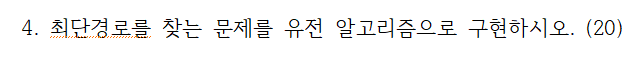

# 4. 최단경로

In [30]:
import numpy as np
import random

graph = {
    '1': {'2': 2.5, '3': 2, '4': 4.5},
    '2': {'5': 5},
    '3': {'6': 5, '7': 11},
    '4': {'5': 1.5, '6': 2},
    '5': {'8': 5},
    '6': {'8': 4.5, '9': 10},
    '7': {'9': 8},
    '8': {'10': 11},
    '9': {'10': 7},
    '10': {},
}


class GeneticAlgorithm:

    def __init__(self, graph, population_size, generations, crossover_rate, mutation_rate):
        self.graph = graph
        self.population_size = population_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate

    def create_individual(self, start, end):
        individual = [start]
        while individual[-1] != end:
            possible_moves = list(self.graph[individual[-1]].keys())
            next_move = random.choice(possible_moves)
            individual.append(next_move)
        return individual

    def create_population(self, start, end):
        population = []
        for _ in range(self.population_size):
            population.append(self.create_individual(start, end))
        return population

    def fitness(self, individual):
        total_distance = 0
        try:
            for i in range(len(individual) - 1):
                total_distance += self.graph[individual[i]][individual[i+1]]
        except KeyError:
            return 0
        return 1 / total_distance


    def crossover(self, parent1, parent2):
        child1 = []
        child2 = []

        if random.random() < self.crossover_rate:
            crossover_point1 = random.randint(1, len(parent1) - 1)
            crossover_point2 = random.randint(1, len(parent2) - 1)

            child1 = parent1[:crossover_point1] + parent2[crossover_point2:]
            child2 = parent2[:crossover_point2] + parent1[crossover_point1:]
        else:
            child1 = parent1.copy()
            child2 = parent2.copy()

        return child1, child2

    def mutate(self, individual):
        if len(individual) > 2 and random.random() < self.mutation_rate:
            index = random.randint(1, len(individual) - 2)
            possible_moves = list(self.graph[individual[index]].keys())
            if possible_moves:
                individual[index] = random.choice(possible_moves)
        return individual


    def solve(self, start, end):
        population = self.create_population(start, end)
        for generation in range(self.generations):
            population.sort(key=self.fitness, reverse=True)
            new_population = population[:int(self.population_size * 0.1)]
            while len(new_population) < self.population_size:
                parent1 = random.choice(population[:int(self.population_size * 0.5)])
                parent2 = random.choice(population[:int(self.population_size * 0.5)])

                child1, child2 = self.crossover(parent1, parent2)
                child1 = self.mutate(child1)
                child2 = self.mutate(child2)

                new_population.extend([child1, child2])

            population = new_population

        return population[0]


def find_shortest_path(start, end):
    ga = GeneticAlgorithm(graph, population_size=100, generations=1000, crossover_rate=0.7, mutation_rate=0.1)
    return ga.solve(start, end)

def get_path_distance(graph, path):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += graph[path[i]][path[i+1]]
    return total_distance

def find_shortest_path(start, end):
    ga = GeneticAlgorithm(graph, population_size=100, generations=1000, crossover_rate=0.7, mutation_rate=0.1)
    shortest_path = ga.solve(start, end)
    path_distance = get_path_distance(graph, shortest_path)
    return shortest_path, path_distance


start = '1'
end = '10'
shortest_path, path_distance = find_shortest_path(start, end)
print("최단 경로: ", shortest_path)
print("거리: ", path_distance)


최단 경로:  ['1', '4', '5', '8', '10']
거리:  22.0


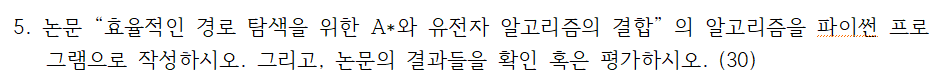

> #### 5. 논문 “효율적인 경로 탐색을 위한 A*와 유전자 알고리즘의 결합” 의 알고리즘을 파이썬 프로그램으로 작성하시오. 그리고, 논문의 결과들을 확인 혹은 평가하시오. (30)

In [3]:
import numpy as np
import random
from itertools import permutations

distance_matrix = np.array([[0, 175, 139, 35, 211],
                            [175, 0, 424, 177, 15],
                            [139, 424, 0, 168, 279],
                            [35, 177, 168, 0, 96],
                            [211, 15, 279, 96, 0]])

def fitness(route):
    distance = 0
    for i in range(len(route) - 1):
        distance += distance_matrix[route[i], route[i + 1]]
    return 1 / distance

def crossover(parent1, parent2):
    rand_idx1 = random.randint(0, len(parent1) - 1)
    rand_idx2 = random.randint(rand_idx1, len(parent1))

    child = [-1] * len(parent1)

    for i in range(rand_idx1, rand_idx2):
        child[i] = parent1[i]

    pointer = 0
    for i in range(len(parent2)):
        if parent2[pointer % len(parent2)] not in child:
            child[child.index(-1)] = parent2[pointer % len(parent2)]
        pointer += 1

    return child

def mutation(route):
    idx1 = random.randint(1, len(route) - 1)
    idx2 = random.randint(1, len(route) - 1)

    mutated = list(route)
    mutated[idx1], mutated[idx2] = route[idx2], route[idx1]
    return mutated

def genetic_algorithm(population, generations=1000, elite_size=2):
    current_gen = population

    for _ in range(generations):
        fitness_values = list(map(fitness, current_gen))
        fittest_routes = sorted([(route, fitness) for route, fitness in zip(current_gen, fitness_values)],
                                 key=lambda x: x[1], reverse=True)

        new_gen = fittest_routes[:elite_size]
        while len(new_gen) < len(population):
            parent1 = random.choice(fittest_routes)[0]
            parent2 = random.choice(fittest_routes)[0]

            child = crossover(parent1, parent2)
            child = mutation(child)
            new_gen.append((child, fitness(child)))

        current_gen = [route for route, fit in new_gen]

    best_route, best_fitness = max(new_gen, key=lambda x: x[1])
    return best_route

def total_distance(route):
    distance = 0
    for i in range(len(route) - 1):
        distance += distance_matrix[route[i], route[i + 1]]
    return distance

def total_distance2(route):
    distance = 0
    for i in range(len(route) - 1):
        distance += distance_matrix[route[i], route[i + 1]]
    return distance

all_permutations = list(permutations(range(1, 5)))
routes_starting_from_zero = [[0] + list(perm) for perm in all_permutations]

# 거리와 경로를 튜플로 저장
routes_with_distances = [(route, total_distance2(route)) for route in routes_starting_from_zero]

# 거리가 짧은 순서로 정렬
sorted_routes_with_distances = sorted(routes_with_distances, key=lambda x: x[1])

# 정렬된 경로와 거리를 출력
for route, distance in sorted_routes_with_distances:
    print(f"Path: {route}, Total distance: {distance}")

initial_population = [list(route) for route in permutations(range(1, 5))]
for route in initial_population:
    route.insert(0, 0)

best_optimal_path = genetic_algorithm(initial_population, generations=100)

best_total_distance = total_distance(best_optimal_path)
print("------------------------------------------------------------")
print(f"Optimal path: {best_optimal_path}")
print(f"Total distance: {best_total_distance}")


Path: [0, 2, 3, 4, 1], Total distance: 418
Path: [0, 1, 4, 3, 2], Total distance: 454
Path: [0, 3, 2, 4, 1], Total distance: 497
Path: [0, 2, 3, 1, 4], Total distance: 499
Path: [0, 3, 1, 4, 2], Total distance: 506
Path: [0, 3, 4, 1, 2], Total distance: 570
Path: [0, 4, 1, 3, 2], Total distance: 571
Path: [0, 2, 4, 1, 3], Total distance: 610
Path: [0, 1, 4, 2, 3], Total distance: 637
Path: [0, 3, 2, 1, 4], Total distance: 642
Path: [0, 2, 1, 4, 3], Total distance: 674
Path: [0, 2, 4, 3, 1], Total distance: 691
Path: [0, 1, 3, 4, 2], Total distance: 727
Path: [0, 1, 3, 2, 4], Total distance: 799
Path: [0, 4, 1, 2, 3], Total distance: 818
Path: [0, 3, 4, 2, 1], Total distance: 834
Path: [0, 4, 2, 3, 1], Total distance: 835
Path: [0, 2, 1, 3, 4], Total distance: 836
Path: [0, 1, 2, 3, 4], Total distance: 863
Path: [0, 4, 3, 2, 1], Total distance: 899
Path: [0, 4, 3, 1, 2], Total distance: 908
Path: [0, 3, 1, 2, 4], Total distance: 915
Path: [0, 1, 2, 4, 3], Total distance: 974
Path: [0, 4

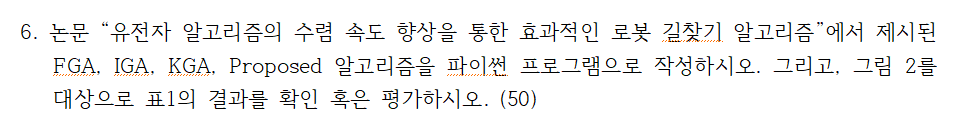

> ##### 6. 논문 “유전자 알고리즘의 수렴 속도 향상을 통한 효과적인 로봇 길찾기 알고리즘”에서 제시된 FGA, IGA, KGA, Proposed 알고리즘을 파이썬 프로그램으로 작성하시오. 그리고, 그림 2를 대상으로 표1의 결과를 확인 혹은 평가하시오. (50) 

# Proposed 알고리즘

경로 내부의 연속된 두 정점을 잇는 간선이 장애물 위에 있다면 P를 안전하지 않은 경로라고 한다.

1. 무작위 이동 방법을 통해 초기 경로 집합 S를 안전한 경로로 구성한다.
2. S로부터 무작위로 경로를 선택한 후에 연산자의 적용 확률에 따라 이점 교차(two-point crossover), 경로 내부에서 무작위로 한 정점을 잡아서 지도 내의 무작위 정점으로 교체하는 돌연변이 연산자, 단축 연산자를 적용하는 방식으로 새로운 경로 집합 M을 생성한다.
3. 적합도 함수를 이용하여 두 경로 집합 S와 M을 평가한다.
4. S와 M을 병합한 후 자연선택 방법을 이용하여 다음 세대의 경로 집합 S를 생성한다.
5. 종료 조건을 만족할 때까지 2~4의 과정을 반복한다.

단축 연산자 : 경로 내부의 두 정점을 선택하고 선택된 구간을 삭제하는 방식으로 경로의 길이를 단축시킨다.
l : 경로 P에 포함된 정점들의 개수
pi : 경로 P의 I번째 정점
g(pi) = - |i - (l+1)/2| + (l-1)/2
f(pi) = g(pi)/( g(1) + g(2) + ... + g(k) )

1. 주어진 경로의 정점들에  g(pi) = - |i - (l+1)/2| + (l-1)/2 와 f(pi) = g(pi)/( g(1) + g(2) + ... + g(k) ) 식들 이용하여 선택 확률을 부여한다.
2. 정점 별로 선택확률이 부여되면 선택 확률에 따라 경로 안에서 두 정점을 선택한다. 정점이 선택되면 두 정점 사이의 다른 정점들을 모두 제거하고 해당 경로를 반환한다.
3. 만약 교차, 돌연변이, 단축 연산자를 적용한 결과로 안전하지 않은 경로가 생성될 경우 연산자를 실행하기 전의 경로를 반환한다. 
4. 만약 경로 P=<1,41,63,65,35,38,60,100> 에서 41과 65가 선택되었다고 한다면, 41과 65를 연결하는 간선은 안전하므로 두 정점을 직접 연결 하고 41과 65 사이의 정점들을 제거한 새로운 경로 P=<1,41,65,35,38,60,100>을 반환한다. 만약 선택된 정점이 35, 60이라면, 두 정점을 연결하는 간선이 안전하지 않기 때문에 원래 경로 P를 그대로 반환한다.

자연선택 단계에서는 현재의 경로 집합과 유전자 연산자를 이용하여 생성된 새로운 경로 집합에서 다음 세대의 경로 집합에 포함될 경로들을 선택한다. 다음 세대의 경로 집합을 생성할 때, 현재 경로 집합의 크기를 N이라고 하면, 현재 경로 집합과 새로 생성한 경로 집합을 병합한 후 평가 값이 우수한 순서대로 정렬하고 N개의 경로를 선택하는 방식으로 다음 세대의 경로 집합을 생성한다. 즉 더 짧은 경로가 다음 세대의 경로 집합에 포함된다.

초기 경로 집합의 크기를 10으로 설정하였다. 최대 세대 수는 10으로 설정하였다. 연산자의 적용 확률을 교차 연산자 0.8, 돌연변이 연산자 0.2, 단축 연산자 0.5로 두고 실험하였다. 모든 실험은 30번씩 반복되었고, 실험 결과에는 반복된 실험들의 평균값을 사용하였다.
경로에 대한 경로의 길이는 해당 경로 내의 모든 간선들의 유클리드 거리의 합으로 나타난다.

In [15]:
import random
import math

# 주어진 조건에 해당하는 지도와 장애물
map_size = 10
map_matrix = [[1,2,3,4,5,6,7,8,9,10],[11,12,13,14,15,16,17,18,19,20],[21,22,23,24,25,26,27,28,29,30],[31,32,33,34,35,36,37,38,39,40],[41,42,43,44,45,46,47,48,49,50],[51,52,53,54,55,56,57,58,59,60],[61,62,63,64,65,66,67,68,69,70],[71,72,73,74,75,76,77,78,79,80],[81,82,83,84,85,86,87,88,89,90],[91,92,93,94,95,96,97,98,99,100]]
obstacles = [3, 4, 13, 14, 18, 19, 20, 23, 24, 33, 34, 46, 47, 56, 57, 66, 67, 72, 73, 79, 82, 83, 89, 95, 96]

# 시작점과 도착점
start = 1
end = 100

def random_path():
    current_node = start
    path = [current_node]

    while len(path) < 10:
        neighbors = get_valid_neighbors(current_node)
        available_neighbors = [n for n in neighbors if n not in path]

        if not available_neighbors:
            return None  # 경로를 찾지 못한 경우

        next_node = random.choice(available_neighbors)
        path.append(next_node)
        current_node = next_node

        if current_node == end:
            if len(path) == 10:
                return path
            else:
                return None

    return None

def get_valid_neighbors(node):
    row, col = find_node_position(node)
    neighbors = []

    # 위로 이동
    for i in range(row-1, -1, -1):
        neighbor = map_matrix[i][col]
        if neighbor not in obstacles:
            neighbors.append(neighbor)
        else:
            break

    # 아래로 이동
    for i in range(row+1, map_size):
        neighbor = map_matrix[i][col]
        if neighbor not in obstacles:
            neighbors.append(neighbor)
        else:
            break

    # 왼쪽으로 이동
    for j in range(col-1, -1, -1):
        neighbor = map_matrix[row][j]
        if neighbor not in obstacles:
            neighbors.append(neighbor)
        else:
            break

    # 오른쪽으로 이동
    for j in range(col+1, map_size):
        neighbor = map_matrix[row][j]
        if neighbor not in obstacles:
            neighbors.append(neighbor)
        else:
            break

    # 대각선 이동
    # 왼쪽 위로 이동
    i, j = row-1, col-1
    while i >= 0 and j >= 0:
        neighbor = map_matrix[i][j]
        if neighbor not in obstacles:
            neighbors.append(neighbor)
            i -= 1
            j -= 1
        else:
            break

    # 오른쪽 위로 이동
    i, j = row-1, col+1
    while i >= 0 and j < map_size:
        neighbor = map_matrix[i][j]
        if neighbor not in obstacles:
            neighbors.append(neighbor)
            i -= 1
            j += 1
        else:
            break

    # 왼쪽 아래로 이동
    i, j = row+1, col-1
    while i < map_size and j >= 0:
        neighbor = map_matrix[i][j]
        if neighbor not in obstacles:
            neighbors.append(neighbor)
            i += 1
            j -= 1
        else:
            break

    # 오른쪽 아래로 이동
    i, j = row+1, col+1
    while i < map_size and j < map_size:
        neighbor = map_matrix[i][j]
        if neighbor not in obstacles:
            neighbors.append(neighbor)
            i += 1
            j += 1
        else:
            break

    return neighbors


def find_node_position(node):
    for i in range(map_size):
        for j in range(map_size):
            if map_matrix[i][j] == node:
                return i, j

    return -1, -1

def two_point_crossover(path1, path2):
    crossover_points = sorted(random.sample(range(1, 9), 2))  # 1과 100 사이의 두 지점 선택
    new_path1 = path1[:crossover_points[0]] + path2[crossover_points[0]:crossover_points[1]] + path1[crossover_points[1]:]
    return new_path1

def is_valid_path(path):
    for i in range(len(path) - 1):
        current_node = path[i]
        next_node = path[i + 1]
        if next_node not in get_valid_neighbors(current_node):
            return False
    return True

def two_point_crossover(path1, path2):
    crossover_points = sorted(random.sample(range(1, 9), 2))  # 1과 100 사이의 두 지점 선택
    new_path1 = path1[:crossover_points[0]] + path2[crossover_points[0]:crossover_points[1]] + path1[crossover_points[1]:]
    return new_path1

def is_valid_path(path):
    for i in range(len(path) - 1):
        current_node = path[i]
        next_node = path[i + 1]
        if next_node not in get_valid_neighbors(current_node):
            return False
    return True

def mutate_path(path):
    if random.random() < 0.2:  # 0.2 확률로 돌연변이 연산
        mutated_path = path.copy()
        num_nodes = len(mutated_path)
        index = random.randint(1, num_nodes - 2)  # 첫 번째 노드와 마지막 노드는 제외하고 중간 노드 중 하나 선택

        # 장애물이 아닌 노드 중 랜덤하게 선택하여 다른 노드로 대체
        valid_neighbors = [node for node in get_valid_neighbors(mutated_path[index]) if node not in obstacles]
        new_node = random.choice(valid_neighbors)
        mutated_path[index] = new_node

        if is_valid_path(mutated_path):
#             print('돌연변이 성공 전', path )
#             print('돌연변이 성공 후', mutated_path)
            return mutated_path
        
#         print('돌연변이 실패 전', path )
#         print('돌연변이 실패 후', mutated_path)
        
    return path


def shorten_path(path):
    num_nodes = len(path)
    g_values = [-(abs(i - (num_nodes + 1) / 2)) + (num_nodes - 1) / 2 for i in range(num_nodes)]
    f_values = [g_values[i] / sum(g_values) for i in range(num_nodes)]

    selected_indices = random.choices(range(1, num_nodes - 1), weights=f_values[1:-1], k=2)
    selected_indices.sort()
    node1 = path[selected_indices[0]]
    node2 = path[selected_indices[1]]

    # Check if a valid path exists between node1 and node2
    if node2 not in get_valid_neighbors(node1):
        return path

    new_path = path[:selected_indices[0] + 1] + path[selected_indices[1]:]
    return new_path

def calculate_distance(path):
    total_distance = 0
    for i in range(len(path) - 1):
        node1 = path[i]
        node2 = path[i + 1]
        x1, y1 = get_coordinates(node1)
        x2, y2 = get_coordinates(node2)
        distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        total_distance += distance
    return total_distance

def get_coordinates(node):
    row, col = find_node_position(node)
    x = col + 1
    y = 10 - row
    return x, y

def calculate_distance(path):
    total_distance = 0
    for i in range(len(path) - 1):
        node1 = path[i]
        node2 = path[i + 1]
        x1, y1 = get_coordinates(node1)
        x2, y2 = get_coordinates(node2)
        distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        total_distance += distance
    return total_distance

def get_coordinates(node):
    row, col = find_node_position(node)
    x = col + 1
    y = 10 - row
    return x, y

def proposed_algorithm(count):
    best_paths = []
    best_distances = []
    for k in range(count):

        # 경로 생성
        paths = []
        while len(paths) < 10:
            path = random_path()
            if path is not None:
                paths.append(path)

        crossover_rate = 0.8
        generations = 10
        
        for generation in range(generations):

            new_paths = []
            for i in range(len(paths)):
                if random.random() < crossover_rate:  # 0.8 확률로 교차연산
                    remaining_paths = paths[:i] + paths[i+1:]
                    other_path = random.choice(remaining_paths)  # 1번째 경로를 제외한 나머지 경로 중 랜덤 선택

                    if len(paths[i]) == len(other_path):
                        new_path = two_point_crossover(paths[i], other_path)

                        # 교차 연산한 경로가 유효한 경로인지 확인
                        if is_valid_path(new_path):
                            new_paths.append(new_path)
                            #print(f"{i+1}번째 경로와 교차 연산 수행")
                        else:
                            # 유효하지 않은 경로인 경우에는 원래 경로를 new_paths 리스트에 추가
                            #print('1111111111111111', new_path)
                            new_paths.append(paths[i])
                    else:
                        new_paths.append(paths[i])
                else:
                    new_paths.append(paths[i])

            # 돌연변이 연산 수행
            mutated_paths = []
            for path in new_paths:
                mutated_path = mutate_path(path)
                if mutated_path is not None:
                    mutated_paths.append(mutated_path)
                else:
                    mutated_paths.append(path)


            # 단축 연산 수행
            shortened_paths = []
            for path in mutated_paths:
                shortened_path = shorten_path(path)
                if shortened_path == path or is_valid_path(shortened_path):
                    shortened_paths.append(shortened_path)
                else:
                    shortened_paths.append(path)

            # Combine paths and shortened_paths
            all_paths = paths + shortened_paths

            # Calculate total distance for each path and print distances
            #print("Distances for all paths:")
            for path in all_paths:
                distance = calculate_distance(path)
                #print(f"Path: {path}, Distance: {distance}")

            # Sort paths based on total distance
            path_distances = [(path, calculate_distance(path)) for path in all_paths]
            sorted_paths = sorted(path_distances, key=lambda x: x[1])

            # Select the 10 shortest paths and print distances
            shortest_paths = [path for path, _ in sorted_paths[:10]]
            #print("\nDistances for shortest paths:")
            for path in shortest_paths:
                distance = calculate_distance(path)
                #print(f"Path: {path}, Distance: {distance}")

            # Combine paths and shortened_paths
            all_paths = paths + shortened_paths

            # Calculate total distance for each path
            path_distances = []
            for path in all_paths:
                distance = calculate_distance(path)
                path_distances.append((path, distance))

            # Sort paths based on total distance
            sorted_paths = sorted(path_distances, key=lambda x: x[1])

            # Select the 10 shortest paths
            shortest_paths = [path for path, _ in sorted_paths[:10]]
            #shortest_distance
            paths = shortest_paths
            #print('shortest_paths : ', shortest_paths)
        
        best_paths.append(shortest_paths[0])
        best_distances.append(calculate_distance(shortest_paths[0]))
        #print(best_distance)
        
    return best_paths, best_distances

best_paths_list, best_distance_list = proposed_algorithm(10)
best_paths_list, best_distance_list

def get_average(values):
    return sum(values) / len(values)

average_best_distance = get_average(best_distance_list)
print("\n평균 최고 거리:")
print(average_best_distance)

# tot_proposed_distance_list = 0
# for ii in range(best_distance_list):
#     tot_proposed_distance_list += ii
# proposed_distance_average = tot_proposed_distance_list / len(best_distance_list)
# proposed_distance_average


평균 최고 거리:
15.202438661763953


# FGA

In [18]:
import random
import numpy as np

def is_valid_step(step, current_path):
    return 1 <= step <= 100 and step not in obstacles and step not in current_path

def get_coordinates(step):
    return ((step - 1) % 10) + 1, ((step - 1) // 10) + 1

def path_length(path):
    coordinates = [get_coordinates(step) for step in path]
    return sum(np.sqrt((coordinates[i][0] - coordinates[i - 1][0]) ** 2 + (coordinates[i][1] - coordinates[i - 1][1]) ** 2) for i in range(1, len(coordinates)))

def possible_movements(step, current_path):
    x, y = get_coordinates(step)
    possibilities = [(x + dx, y + dy) for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]]
    valid_possibilities = [(x, y) for x, y in possibilities if (1 <= x <= 10 and 1 <= y <= 10)]
    valid_steps = [1 + (y - 1) * 10 + (x - 1) for x, y in valid_possibilities if is_valid_step(1 + (y - 1) * 10 + (x - 1), current_path)]

    return valid_steps

def construct_path(parents):
    offspring = []
    for step in parents[0]:
        if step not in offspring and (not offspring or step in possible_movements(offspring[-1], offspring)):
            offspring.append(step)
        if step == end:
            break
    for step in parents[1]:
        if step not in offspring and (not offspring or step in possible_movements(offspring[-1], offspring)):
            offspring.append(step)
        if step == end:
            break
    return offspring

def tournament_selection(population, tournament_size=3):
    competitors = random.sample(population, tournament_size)
    return min(competitors, key=path_length)

grid_size = (10, 10)
obstacles = {3, 4, 13, 14, 18, 19, 20, 23, 24, 33, 34, 46, 47, 56, 57, 66, 67, 72, 73, 79, 82, 83, 89, 95, 96}
start = 1
end = 100

population_size = 10
max_generations = 10
crossover_prob = 0.8
mutation_prob = 0.2
shortcut_prob = 0.5

total_lengths = 0

for _ in range(30):
    population = []

    while len(population) < population_size:
        path = [start]
        while len(path) < 19:
            possible_steps = possible_movements(path[-1], path)

            if possible_steps:
                next_step = random.choice(possible_steps)
                path.append(next_step)
            else:
                break
        if end in path:
            population.append(path)

    for gen in range(max_generations):
        new_population = []

        for _ in range(population_size):
            parents = [tournament_selection(population) for _ in range(2)]

            if random.random() < crossover_prob:
                offspring = construct_path(parents)
            else:
                offspring = parents[0]

            if random.random() < mutation_prob:
                mutation_point = random.randint(1, len(offspring) - 1)
                possible_mutations = possible_movements(offspring[mutation_point], offspring[:mutation_point] + offspring[mutation_point+1:])
                if possible_mutations:
                    mutated_step_candidates = random.sample(possible_mutations, min(3, len(possible_mutations)))
                    mutated_step = min(mutated_step_candidates, key=lambda step: np.sqrt((get_coordinates(step)[0] - get_coordinates(offspring[mutation_point])[0]) ** 2 + (get_coordinates(step)[1] - get_coordinates(offspring[mutation_point])[1]) ** 2))
                    offspring[mutation_point] = mutated_step

            if len(offspring) > 3 and random.random() < shortcut_prob:
                shortcut_start = random.randint(1, len(offspring) - 2)
                offspring = offspring[:shortcut_start] + offspring[shortcut_start + 1:]

            new_population.append(offspring)

        population = new_population

        if any(path[-1] == end for path in population):
            break

    shortest_path = min(population, key=path_length)
    total_lengths += path_length(shortest_path)

average_length = total_lengths / 30
print("평균 길이:", average_length)


평균 길이: 17.472792206135793


In [26]:
import random
import numpy as np

def is_valid_step(step, current_path):
    return 1 <= step <= 100 and step not in obstacles and step not in current_path

def get_coordinates(step):
    return ((step - 1) % 10) + 1, ((step - 1) // 10) + 1

def path_length(path):
    coordinates = [get_coordinates(step) for step in path]
    return sum(np.sqrt((coordinates[i][0] - coordinates[i - 1][0]) ** 2 + (coordinates[i][1] - coordinates[i - 1][1]) ** 2) for i in range(1, len(coordinates)))

def valid_adjacent(step, current_path):
    x, y = get_coordinates(step)
    deltas = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    neighbours = [(x + dx, y + dy) for dx, dy in deltas]
    valid_neighbours = [(x, y) for x, y in neighbours if 1 <= x <= 10 and 1 <= y <= 10]
    valid_steps = [
        1 + (y - 1) * 10 + (x - 1)
        for x, y in valid_neighbours
        if is_valid_step(1 + (y - 1) * 10 + (x - 1), current_path)
    ]

    return valid_steps

grid_size = (10, 10)
obstacles = {3, 4, 13, 14, 18, 19, 20, 23, 24, 33, 34, 46, 47, 56, 57, 66, 67, 72, 73, 79, 82, 83, 89, 95, 96}
start = 1
end = 100

population_size = 10
max_generations = 10
crossover_prob = 0.8
mutation_prob = 0.2

total_lengths = 0

for run in range(1, 11):
    #print(f"실행 {run}")
    population = []

    while len(population) < population_size:
        path = [start]
        while len(path) < 19:
            valid_steps = valid_adjacent(path[-1], path)

            if valid_steps:
                next_step = random.choice(valid_steps)
                path.append(next_step)
            else:
                break

        if end in path:
            population.append(path)

    for gen in range(max_generations):
        new_population = []

        for _ in range(population_size):
            parents = random.sample(population, 2)
            offspring = []

            if random.random() < crossover_prob:
                cross_point = random.randint(1, min(len(parents[0]), len(parents[1])) - 1)
                offspring = parents[0][:cross_point]

                for gene in parents[1]:
                    if gene not in offspring:
                        offspring.append(gene)
                        
                if end not in offspring:
                    offspring.append(end)

            else:
                offspring = parents[0]

            if random.random() < mutation_prob:
                mutation_point = random.randint(1, len(offspring) - 2)
                possible_mutations = valid_adjacent(offspring[mutation_point], offspring[:mutation_point] + offspring[mutation_point+1:])
                if possible_mutations:
                    mutated_step = random.choice(possible_mutations)
                    offspring[mutation_point] = mutated_step

            new_population.append(offspring)

        population = new_population[:]

    shortest_path = min(population, key=path_length)
    shortest_length = path_length(shortest_path)
    
    total_lengths += shortest_length
#     print(f"경로: {shortest_path} ")
#     print(f"길이: {shortest_length}\n")

average_length = total_lengths / 10
print("평균 길이:", average_length)


평균 길이: 43.67805428648883


# IGA

In [21]:
import random
import numpy as np

def is_valid_step(step, current_path):
    return 1 <= step <= 100 and step not in obstacles and step not in current_path

def get_coordinates(step):
    return ((step - 1) % 10) + 1, ((step - 1) // 10) + 1

def path_length(path):
    coordinates = [get_coordinates(step) for step in path]
    return sum(np.sqrt((coordinates[i][0] - coordinates[i - 1][0]) ** 2 + (coordinates[i][1] - coordinates[i - 1][1]) ** 2) for i in range(1, len(coordinates)))

def possible_movements(step, current_path):
    x, y = get_coordinates(step)
    possibilities = [(x + dx, y + dy) for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]]
    valid_possibilities = [(x, y) for x, y in possibilities if (1 <= x <= 10 and 1 <= y <= 10)]
    valid_steps = [1 + (y - 1) * 10 + (x - 1) for x, y in valid_possibilities if is_valid_step(1 + (y - 1) * 10 + (x - 1), current_path)]

    return valid_steps

grid_size = (10, 10)
obstacles = {3, 4, 13, 14, 18, 19, 20, 23, 24, 33, 34, 46, 47, 56, 57, 66, 67, 72, 73, 79, 82, 83, 89, 95, 96}
start = 1
end = 100

population_size = 5
max_generations = 100
crossover_prob = 0.8
mutation_prob = 0.2

total_lengths = 0

for run in range(1, 31):
    #print(f"실행 {run}")
    population = []

    while len(population) < population_size:
        path = [start]
        while len(path) < 19:
            possible_steps = possible_movements(path[-1], path)

            if possible_steps:
                next_step = random.choice(possible_steps)
                path.append(next_step)
            else:
                break

        if end in path:
            population.append(path)

    for gen in range(max_generations):
        new_population = []

        for _ in range(population_size):
            parents = random.sample(population, 2)
            offspring = []

            if random.random() < crossover_prob:
                cross_point = random.randint(1, min(len(parents[0]), len(parents[1])) - 1)
                offspring = parents[0][:cross_point]

                for gene in parents[1]:
                    if gene not in offspring:
                        offspring.append(gene)
                        
                if end not in offspring:
                    offspring.append(end)

            else:
                offspring = parents[0]

            if random.random() < mutation_prob:
                mutation_point = random.randint(1, len(offspring) - 2)
                possible_mutations = possible_movements(offspring[mutation_point], offspring[:mutation_point] + offspring[mutation_point+1:])
                if possible_mutations:
                    mutated_step = random.choice(possible_mutations)
                    offspring[mutation_point] = mutated_step

            new_population.append(offspring)

        population = new_population[:]

        if any(path[-1] == end for path in population):
            break

    shortest_path = min(population, key=path_length)
    shortest_length = path_length(shortest_path)
    
    total_lengths += shortest_length
#     print(f"경로: {shortest_path}")
#     print(f"길이: {shortest_length}\n")

average_length = total_lengths / 30
print("평균 길이:", average_length)


평균 길이: 18.39664983122039


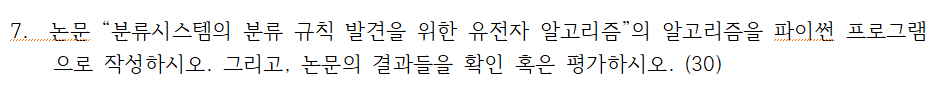

> ##### 7. 논문 “분류시스템의 분류 규칙 발견을 위한 유전자 알고리즘”의 알고리즘을 파이썬 프로그램으로 작성하시오. 그리고, 논문의 결과들을 확인 혹은 평가하시오. (30)

In [28]:
import numpy as np
import random

INITIAL_POPULATION_SIZE = 20
CHROMOSOME_LENGTH = 10
GENERATIONS = 50
MUTATION_RATE = 0.1
TOURNAMENT_SIZE = 5
ELITISM_SIZE = 1

def initialize_population():
    return np.random.randint(2, size=(INITIAL_POPULATION_SIZE, CHROMOSOME_LENGTH))

def fitness_function(individual):
    return sum(individual)  # 간단한 피트니스 함수 예시

def selection(population):
    selected = []
    fitnesses = [fitness_function(ind) for ind in population]
    
    for _ in range(TOURNAMENT_SIZE):
        candidates = np.random.choice(len(population), size=3)
        best_candidate = max(candidates, key=lambda x: fitnesses[x])
        selected.append(population[best_candidate])
    
    return np.array(selected)

def crossover(parent1, parent2):
    crossover_point = random.randint(1, CHROMOSOME_LENGTH - 1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

def mutation(individual):
    for i in range(CHROMOSOME_LENGTH):
        if random.random() < MUTATION_RATE:
            individual[i] = 1 - individual[i]  # 비트 반전
    return individual

def run_genetic_algorithm():
    population = initialize_population()
    
    for generation in range(GENERATIONS):
        next_generation = []
        for _ in range(0, len(population) - ELITISM_SIZE, 2):
            parents = selection(population)
            child1, child2 = crossover(parents[0], parents[1])
            next_generation.extend([mutation(child1), mutation(child2)])
        
        # 엘리트 유전자를 다음 세대로 전파
        elites = sorted(population, key=fitness_function, reverse=True)[:ELITISM_SIZE]
        next_generation.extend(elites)
        
        population = np.array(next_generation)

    return sorted(population, key=fitness_function, reverse=True)[0]

best_individual = run_genetic_algorithm()
print("Finished. Best individual:", best_individual)


Finished. Best individual: [1 1 1 1 1 1 1 1 1 1]
